<a href="https://colab.research.google.com/github/Noam-and-Iftach/DS20936/blob/main/fastasi_based_item_based_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import polars as pl
import pyarrow as pa
import pyarrow.parquet as pq
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path=f"/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/1_book_after_preprocessing.parquet"

In [3]:
df = pl.read_parquet(file_path)
df_pandas = df.to_pandas()

We take only those who are had reviewed 50 reviews at first. On one hand, we do not want users that reviewed 3000 books, with the same review, because this are not legitimic users. On the other hand, we understood that the way recommendation system works is based on data that the user voted, and this is the minimun to make the recommendation system work. At first we just want to build few pytorch-based recommendation models, and then, once decidiing which model we would use, we will expand both the amount of users (by expanding this query to more than 50, and taking users from more than one file.)

In [10]:
user_counts = df_pandas['reviewerID'].value_counts()
users_with_50_reviews = user_counts[(user_counts == 50)]
num_users_50_reviews = len(users_with_50_reviews)
print(f"Number of users with 50 records: {num_users_50_reviews}")



Number of users with 50 records: 91


In [11]:
filtered_users = users_with_50_reviews.index.tolist()
df_filtered = df_pandas[df_pandas['reviewerID'].isin(filtered_users)]
print("Filtered DataFrame:")
print(df_filtered)

Filtered DataFrame:
         overall  verified      reviewerID        asin  \
10539          1     False  A2AGQEL3O3S9H6  0002213311   
10548          3      True  A2Y0RQNQHT5MZ8  0002213311   
10752          4     False  A22JKQCL7OGP5Z  0002213311   
11312          4      True  A2G6YIMXBJK5RJ  0002226723   
12334          5     False   AOHKH73SA3ZK7  0002172690   
...          ...       ...             ...         ...   
3683509        5     False  A3VPUP25AWG7RQ  0316378232   
3683561        3     False   AIPU7J25O7CGA  0316378232   
3686007        4     False  A2E0J2IFOWM12F  0316362263   
3686010        5     False  A2R1HUYHXV7H18  0316362263   
3686730        4     False  A1HUJAZ7LZ1A0S  0316349569   

                                         style  \
10539    {'Format:': ' Mass Market Paperback'}   
10548                {'Format:': ' Hardcover'}   
10752                {'Format:': ' Hardcover'}   
11312    {'Format:': ' Mass Market Paperback'}   
12334                {'Format:': 

In [12]:
del df_pandas, df
import gc
gc.collect()

13111

now we take the 15 most popular books, and from them we take the 15 most popular users that reviewed the most books. This is done in order to create a tiny model and understand how the recommendation system would work.

In [ ]:


# asin_counts = df_filtered['asin'].value_counts()
# top_asins = asin_counts.head(15).index.tolist()
# df_subset2 = df_filtered[df_filtered['asin'].isin(top_asins)]


# # Get the top 15 most popular reviewers and asins
# reviewer_counts = df_subset2['reviewerID'].value_counts()

# top_reviewers = reviewer_counts.head(15).index.tolist()
# df_subset = df_subset2[(df_subset2['reviewerID'].isin(top_reviewers))]



# # Create a subset DataFrame based on the top reviewers and asins
# df_subset.head(15)

In [13]:
len(df_filtered)
df_subset=df_filtered

In [14]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:


# Generate random weights for each user/book combination
df_subset['weight'] = torch.rand(len(df_subset))

# Fill missing ratings with 0 (assuming 0 represents no rating given)
#df_subset['overall'] = df_subset['overall'].fillna(0)

# Split data into train and test sets
train_df, test_df = train_test_split(df_subset, test_size=0.2)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(df_subset['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(df_subset['asin'].unique())}

# Convert user and book IDs to integers in the DataFrame
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)

# Use existing user and book factors as embeddings


# First model
The embedding is the part that creates random values (with length of n_user or n_books multiplied by n_factors). It is the equivalant of running code with nn.Parameter(user_factors), and to create the random values with randn before the creation of the model.

In [ ]:


# # Define a simple collaborative filtering model
# class CFModel(nn.Module):
#     def __init__(self, n_users,n_books, n_factors=5):
#         super(CFModel, self).__init__()
#         self.user_factors = nn.Embedding(n_users, n_factors)
#         self.books_factors = nn.Embedding(n_books, n_factors)

#     def forward(self, user_idx, book_idx):
#         user_embed = self.user_factors(user_idx)
#         book_embed = self.books_factors(book_idx)
#         pred_rating = (user_embed * book_embed).sum(dim=1)
#         return pred_rating

# # Instantiate the model
# model = CFModel(15, 15)


In [ ]:

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# # Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     optimizer.zero_grad()
#     user_idx_tensor = torch.LongTensor(train_df['user_idx'].values)
#     book_idx_tensor = torch.LongTensor(train_df['book_idx'].values)
#     ratings_tensor = torch.FloatTensor(train_df['overall'].values)
#     pred_ratings = model(user_idx_tensor, book_idx_tensor)
#     loss = criterion(pred_ratings, ratings_tensor)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# # Evaluate model on test set
# model.eval()
# user_idx_tensor = torch.LongTensor(test_df['user_idx'].values)
# book_idx_tensor = torch.LongTensor(test_df['book_idx'].values)
# pred_ratings = model(user_idx_tensor, book_idx_tensor)
# rmse = mean_squared_error(test_df['overall'].values, pred_ratings.detach().numpy(), squared=False)
# print(f'RMSE on test set: {rmse}')


### Adding bias
This is done since there are users who rate more positive or negative than others, and there are some books that are plain better or worse than others. We will create number for each user that we can add to our socres and ditto for each book, to handle that.

In [ ]:
n_factors = 5
n_users = df_filtered['reviewerID'].nunique()
n_books = df_filtered['asin'].nunique()


In [ ]:

class CollaborativeFilteringModel(nn.Module):
    def __init__(self, n_users, n_books, n_factors=5, y_range=(0, 5.5)):
        super(CollaborativeFilteringModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.y_range = y_range

    def forward(self, user_idx, book_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)
        res = (user_embed * book_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]

model = CollaborativeFilteringModel(n_users,n_books, n_factors)




In [ ]:

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# # Added L2 regularization with weight_decay


# # Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     optimizer.zero_grad()
#     user_idx_tensor = torch.LongTensor(train_df['user_idx'].values)
#     book_idx_tensor = torch.LongTensor(train_df['book_idx'].values)
#     ratings_tensor = torch.FloatTensor(train_df['overall'].values)
#     pred_ratings = model(user_idx_tensor, book_idx_tensor)
#     loss = criterion(pred_ratings, ratings_tensor)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# # Evaluate model on test set
# model.eval()
# user_idx_tensor = torch.LongTensor(test_df['user_idx'].values)
# book_idx_tensor = torch.LongTensor(test_df['book_idx'].values)
# pred_ratings = model(user_idx_tensor, book_idx_tensor)

# rmse = mean_squared_error(test_df['overall'].values, pred_ratings.detach().numpy(), squared=False)
# print(f'RMSE on test set: {rmse}')


### Regularization:
This is done because the loss increases without it.

In [ ]:


# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.05)
# Added L2 regularization with weight_decay


# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    user_idx_tensor = torch.LongTensor(train_df['user_idx'].values)
    book_idx_tensor = torch.LongTensor(train_df['book_idx'].values)
    ratings_tensor = torch.FloatTensor(train_df['overall'].values)
    pred_ratings = model(user_idx_tensor, book_idx_tensor)
    loss = criterion(pred_ratings, ratings_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluate model on test set
model.eval()


user_idx_tensor = torch.LongTensor(test_df['user_idx'].values)
book_idx_tensor = torch.LongTensor(test_df['book_idx'].values)
pred_ratings = model(user_idx_tensor, book_idx_tensor)

rmse = mean_squared_error(test_df['overall'].values, pred_ratings.detach().numpy(), squared=False)
print(f'RMSE on test set: {rmse}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([39851])) that is different to the input size (torch.Size([39851, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Loss: 6.640993118286133
Epoch 2/20, Loss: 6.235169410705566
Epoch 3/20, Loss: 5.827332496643066
Epoch 4/20, Loss: 5.430875778198242
Epoch 5/20, Loss: 5.055535316467285
Epoch 6/20, Loss: 4.70916748046875
Epoch 7/20, Loss: 4.397369861602783
Epoch 8/20, Loss: 4.122897148132324
Epoch 9/20, Loss: 3.885408639907837
Epoch 10/20, Loss: 3.6823081970214844
Epoch 11/20, Loss: 3.510458469390869
Epoch 12/20, Loss: 3.366706371307373
Epoch 13/20, Loss: 3.247678279876709
Epoch 14/20, Loss: 3.1498332023620605
Epoch 15/20, Loss: 3.0697290897369385
Epoch 16/20, Loss: 3.0042386054992676
Epoch 17/20, Loss: 2.9506425857543945
Epoch 18/20, Loss: 2.9066150188446045
Epoch 19/20, Loss: 2.8702080249786377
Epoch 20/20, Loss: 2.839890956878662
RMSE on test set: 1.6811453950999924


In [ ]:
# Generate top recommendations for each user
all_users = train_df['user_idx'].unique()
all_books = train_df['book_idx'].unique()

recommendations = []

with torch.no_grad():
    for user in all_users:
        user_idx_tensor = torch.LongTensor([user] * len(all_books))
        book_idx_tensor = torch.LongTensor(all_books)
        pred_ratings = model(user_idx_tensor, book_idx_tensor).squeeze()
        top_books_idx = torch.argsort(pred_ratings, descending=True)[:10]  # Top 10 recommendations
        top_books = all_books[top_books_idx]
        recommendations.append((user, top_books))

# Print top recommendations for each user
for user, recs in recommendations:
    print(f"Top recommendations for user {user}: {recs}")

Top recommendations for user 574: [19345  5266  8610 15980 12863   682  2282 19919  2391 15042]
Top recommendations for user 1079: [19345  5266  8610   682 15528 19919 15980 12863  7192  2282]
Top recommendations for user 528: [19345  5266  8610   682 12863 19919  2282 15980 15528 15042]
Top recommendations for user 417: [19345  5266  8610 12863  2282   682 19919 13105 15980 15042]
Top recommendations for user 641: [19345  5266  8610   682 15980  7192 15528 12863 19919 15042]
Top recommendations for user 57: [19345  5266  8610   682 15528 12863 19919  2282 15980 15042]
Top recommendations for user 3: [19345  5266  8610   682  2282 12863 19919 15528 13105 15042]
Top recommendations for user 681: [19345  5266  8610 12863   682  2282 19919 15980 15042 13105]
Top recommendations for user 150: [19345  5266  8610   682 12863 19919  2282 15528 15980 13105]
Top recommendations for user 214: [19345  5266  9525  8610 12863 19919  4170  2282  6524   682]
Top recommendations for user 260: [19345  

# From here we try to upload the metadata and take genre from it

In [ ]:
file_path=f"/content/drive/MyDrive/meta-books-parquet/meta_books_chunk_1.parquet"

In [ ]:
import polars as pl
import pandas as pd

df_meta = pl.read_parquet(file_path)
df_meta_pandas = df_meta.to_pandas()

In [ ]:
dataframes = []


for i in range(1, 148):

    file_path = f"/content/drive/MyDrive/meta-books-parquet/meta-books-csv-chunk_{i}.parquet"

    df_meta = pl.read_parquet(file_path)

    df_meta_pandas = df_meta.to_pandas()

    dataframes.append(df_meta_pandas)

combined_df = pd.concat(dataframes, ignore_index=True)

In [ ]:

combined_df['category'] = combined_df['category'].astype(str)

In [ ]:
counting_genres=combined_df['category'].value_counts()

In [ ]:
counting_genres.to_csv("counting_genres.csv")

In [ ]:
counting_genres

category
[]                                                                               389429
['Books', 'Literature &amp; Fiction', 'Genre Fiction']                            70204
['Books', 'History', 'Americas']                                                  68370
['Books', 'New, Used &amp; Rental Textbooks', 'Humanities']                       43530
['Books', 'Literature & Fiction', 'Genre Fiction']                                42191
                                                                                  ...  
['Books', 'History', 'Asia', 'India']                                                 1
['Books', 'Travel', 'Europe', 'Norway', 'General']                                    1
['Books', 'Arts &amp; Photography', 'History &amp; Criticism', 'History']             1
['Books', 'Arts & Photography', 'Individual Artists', "Artists' Books"]               1
['Books', 'Business & Money', 'Marketing & Sales', 'Marketing', 'Multilevel']         1
Name: count, Length: 19

In [ ]:

df = counting_genres.reset_index()
df.columns = ['category', 'count']
df.head()

,category,count
0,[],389429
1,"['Books', 'Literature &amp; Fiction', 'Genre F...",70204
2,"['Books', 'History', 'Americas']",68370
3,"['Books', 'New, Used &amp; Rental Textbooks', ...",43530
4,"['Books', 'Literature & Fiction', 'Genre Ficti...",42191


In [ ]:
import ast
def string_to_list(category_string):
    return ast.literal_eval(category_string)

In [ ]:
import re


# Function to extract the desired category
def extract_category(categories):
    if not categories:
        return "unknown"  # Return the empty list as is
    if len(categories) == 1:
        return categories[0]
    else:
      second_item = categories[1]
      third_item = categories[2] if len(categories) > 2 else None

    # Check for the specific categories
    # if the second category is "New, Used & Rental Textbooks" we move to the third item
    if re.match(r'New, Used (&amp;|&) Rental Textbooks', second_item):
        if third_item:
            return third_item
        # this case is when there are only two categories (['Books', 'New, Used &amp; Rental Textbooks'] or ['Books', 'New, Used & Rental Textbooks'])
        return "unknown"
    else:
        # Return the second category, with HTML entity replaced
        return re.sub(r'&amp;', '&', second_item)
df['category_list'] = df['category'].apply(string_to_list)

# Apply the function to the category column
df['extracted_category'] = df['category_list'].apply(extract_category)

print(df[['extracted_category']])


        extracted_category
0                  unknown
1     Literature & Fiction
2                  History
3               Humanities
4     Literature & Fiction
...                    ...
1957               History
1958                Travel
1959    Arts & Photography
1960    Arts & Photography
1961      Business & Money

[1962 rows x 1 columns]


In [ ]:
df['extracted_category'] = df['extracted_category'].astype(str)
grouped_df = df.groupby('extracted_category')['count'].sum().reset_index()

In [ ]:
print(grouped_df)

                            extracted_category   count
0                           Arts & Photography  158286
1                        Biographies & Memoirs   91109
2                           Business & Finance    1119
3                             Business & Money   88142
4                       Business &amp; Finance    3814
5                                    Calendars   11047
6                             Children's Books  241105
7                     Christian Books & Bibles  150126
8                      Comics & Graphic Novels   41571
9                   Communication & Journalism      14
10              Communication &amp; Journalism      83
11                            Computer Science     668
12                      Computers & Technology   51133
13                      Cookbooks, Food & Wine   52505
14                      Crafts, Hobbies & Home  100310
15                                   Education    3996
16                        Education & Teaching   43512
17        

# Now we combine categories based on common knowledge, and what we think that should be the same category

In [ ]:
replacement_dict = {
    'Business & Finance': 'Business & Money',
    'Business &amp; Finance': 'Business & Money',
    'Communication &amp; Journalism': 'Communication & Journalism',
    'Computers & Technology': 'Computer Science',
    'Education': 'Education & Teaching',
    'Medicine & Health Sciences': 'Medical Books',
    'Medicine &amp; Health Sciences': 'Medical Books',
    'Science & Mathematics': 'Science & Math',
    'Science &amp; Mathematics': 'Science & Math',
    'Social Sciences': 'Politics & Social Sciences',
    'Test Prep & Study Guides': 'Test Preparation',
    'Test Prep &amp; Study Guides': 'Test Preparation'
}

# Replace the values in the 'extracted_category' column
df['extracted_category'] = df['extracted_category'].replace(replacement_dict)

In [ ]:
grouped_df = df.groupby('extracted_category')['count'].sum().reset_index()
print(grouped_df)

                            extracted_category   count
0                           Arts & Photography  158286
1                        Biographies & Memoirs   91109
2                             Business & Money   93075
3                                    Calendars   11047
4                             Children's Books  241105
5                     Christian Books & Bibles  150126
6                      Comics & Graphic Novels   41571
7                   Communication & Journalism      97
8                             Computer Science   51801
9                       Cookbooks, Food & Wine   52505
10                      Crafts, Hobbies & Home  100310
11                        Education & Teaching   47508
12                Engineering & Transportation   51961
13                   Health, Fitness & Dieting   51567
14                                     History  138229
15                                  Humanities   58410
16                       Humor & Entertainment   49991
17        

# merging the extracted categories (df) after all preprocessing, with the relevant asins from the combnined_df that contains all the metadata categories

In [ ]:
combined_df = combined_df[["category", "asin"]]

In [ ]:
combined_df.head()

,category,asin
0,[],0000092878
1,"['Books', 'New, Used & Rental Textbooks', 'Med...",000047715X
2,"['Books', 'Arts & Photography', 'Music']",0000004545
3,"['Books', 'Arts & Photography', 'Music']",0000013765
4,[],0000000116


In [ ]:
result_df = combined_df.merge(df, on='category', how='left')


In [ ]:
result_df= result_df[["asin", "extracted_category"]]

In [ ]:
print(result_df)

               asin            extracted_category
0        0000092878                       unknown
1        000047715X                 Medical Books
2        0000004545            Arts & Photography
3        0000013765            Arts & Photography
4        0000000116                       unknown
...             ...                           ...
2934944  B01HJBPTUI  Mystery, Thriller & Suspense
2934945  B01HJC63ZM          Literature & Fiction
2934946  B01HJEB422                       unknown
2934947  B01HJDS76Y       Religion & Spirituality
2934948  B01HJFHYMA                       unknown

[2934949 rows x 2 columns]


In [ ]:
result_df.to_parquet("asin_to_category.parquet")

# Let's combine the first book with the asin_to_category

In [9]:
asin_file=f"/content/drive/MyDrive/asin_to_category.parquet"

In [10]:
asin_to_category = pd.read_parquet(asin_file)

The result of next line is the reviews, with generes extracted from the metadata file:

In [11]:
result_df = df_filtered.merge(asin_to_category, on='asin', how='left')

In [12]:
result_df['extracted_category'].nunique()

33

In [ ]:
result_df['extracted_category'].unique()

array(['unknown', 'Literature & Fiction', 'Science Fiction & Fantasy',
       'Science & Math', 'Travel', "Children's Books",
       'Biographies & Memoirs', 'Self-Help', 'Christian Books & Bibles',
       'Mystery, Thriller & Suspense', 'Business & Money', 'Romance',
       'Comics & Graphic Novels', 'Sports & Outdoors',
       'Politics & Social Sciences', 'Humanities', 'Medical Books',
       'Humor & Entertainment', 'Health, Fitness & Dieting', 'History',
       'Cookbooks, Food & Wine', 'Law', 'Reference', 'Arts & Photography',
       'Religion & Spirituality',
       'Lesbian, Gay, Bisexual & Transgender Books', 'Teen & Young Adult',
       'Crafts, Hobbies & Home', 'Computer Science',
       'Parenting & Relationships', 'Engineering & Transportation',
       'Education & Teaching', 'Test Preparation'], dtype=object)

In [ ]:
# Generate random weights for each user/book combination
result_df['weight'] = torch.rand(len(result_df))



# Split data into train and test sets
train_df, test_df = train_test_split(result_df, test_size=0.2)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(result_df['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(result_df['asin'].unique())}


In [ ]:

category_to_idx = {}

# Enumerate through unique categories in result_df['extracted_category']
for i, category in enumerate(result_df['extracted_category'].unique()):
    if category != 'unknown':
        category_to_idx[category] = i-1

# Add the special index for unknown categories
category_to_idx['unknown'] = i

# Convert user and book IDs to integers in the DataFrame
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
train_df['category_idx'] = train_df['extracted_category'].map(category_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)
test_df['category_idx'] = test_df['extracted_category'].map(category_to_idx)

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

In [ ]:


class CollaborativeFilteringModel(nn.Module):
    def __init__(self, n_users, n_books, n_categories, n_factors=5, y_range=(0, 5.5)):
        super(CollaborativeFilteringModel, self).__init__()
        self.n_categories = n_categories
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.category_factors = nn.Embedding(n_categories, n_factors)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, category_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)

        # Handle unknown categories by using a neutral vector
        category_embed = torch.where(category_idx.unsqueeze(1) == self.n_categories-1,
                                     torch.zeros_like(user_embed),
                                     self.category_factors(category_idx))

        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)

        res = (user_embed * book_embed * category_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]


# Assuming you have `n_users`, `n_books`, and `n_categories` defined
# n_users = len(train_df['user_idx'].unique())
# n_books = len(train_df['book_idx'].unique())
# n_categories = len(train_df['category_idx'].unique())



In [ ]:
n_users = df_filtered['reviewerID'].nunique()
n_books = df_filtered['asin'].nunique()

n_categories = 33

print(f'Number of users: {n_users}')
print(f'Number of books: {n_books}')
print(f'Number of categories: {n_categories}')

print("User to index mapping:", user_to_idx)
print("Book to index mapping:", book_to_idx)
print("Category to index mapping:", category_to_idx)

print("Sample of train_df:")
print(train_df.head())

print("Sample of test_df:")
print(test_df.head())

print("Unique user indices in train set:", train_df['user_idx'].unique())
print("Unique book indices in train set:", train_df['book_idx'].unique())
print("Unique category indices in train set:", train_df['category_idx'].unique())

Number of users: 1117
Number of books: 20025
Number of categories: 33
User to index mapping: {'AEC46NVS07MJ9': 0, 'A3HCPK54FATFO4': 1, 'A3TGNIQ0R3V6L7': 2, 'A2KP0ONGECY1WT': 3, 'A163MG6D98NFDR': 4, 'AKZJW4ZRFTKZD': 5, 'A359IT81FBX64Y': 6, 'A1RGTGCP7UG4ZA': 7, 'ARIZ8PY9ULPHH': 8, 'A2SETXU4UY67C9': 9, 'A2WZNM833CJH82': 10, 'A1S6U42368WJQE': 11, 'A3PVNAH1XH34FM': 12, 'A1WAFE0FZWA1BN': 13, 'A3LJSF0LV5QRYT': 14, 'A1TMAVN4CEM8U8': 15, 'A1G9TLZ8I5X0CA': 16, 'A1LDAIGOQ6N4DW': 17, 'AI1JXIIF2S73': 18, 'A5ICDTC3HI26L': 19, 'A1JIPFV4OL520T': 20, 'A3684EUAEHIV67': 21, 'A13EUSV15UDAUG': 22, 'ASJWCXE10I8AZ': 23, 'A3AKWA5CWSKOOH': 24, 'A3W2FXLOW52NAO': 25, 'A3JFQTO9RGTGX1': 26, 'AUEHG0DB54B7K': 27, 'A2K4XUTGYXMDUD': 28, 'AIUM0682KEGAY': 29, 'A22AHT34TGOWO6': 30, 'A2ODF4T1AAN83E': 31, 'A2JQDXUDWCRQ87': 32, 'A3FMPT5IH0CJ50': 33, 'A10LKYQ1D8LPK8': 34, 'A246D56KFO5CG': 35, 'A2ZR0OODI6L27A': 36, 'AO79KZQM6WAAG': 37, 'A1ZENB34HH2EIM': 38, 'AWVQR7YYTYJ1L': 39, 'A3CFBDIKSJNYFE': 40, 'ARMVAHWQQ9S8A': 41, 'A3BR

In [ ]:
model = CollaborativeFilteringModel(n_users, n_books, n_categories)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.05)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
    book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
    category_idx_tensor = torch.LongTensor(train_df['category_idx'].values).to(device)
    ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)

    pred_ratings = model(user_idx_tensor, book_idx_tensor, category_idx_tensor).squeeze()
    loss = criterion(pred_ratings, ratings_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Evaluate model on test set
model.eval()
with torch.no_grad():
    # Move tensors to device
    user_idx_tensor = torch.LongTensor(test_df['user_idx'].values).to(device)
    book_idx_tensor = torch.LongTensor(test_df['book_idx'].values).to(device)
    category_idx_tensor = torch.LongTensor(test_df['category_idx'].values).to(device)

    # Forward pass
    pred_ratings = model(user_idx_tensor, book_idx_tensor, category_idx_tensor).squeeze().cpu().numpy()


rmse = mean_squared_error(test_df['overall'].values, pred_ratings, squared=False)
print(f'RMSE on test set: {rmse}')

Epoch 1/20, Loss: 2.622459650039673
Epoch 2/20, Loss: 2.6204161643981934
Epoch 3/20, Loss: 2.6190102100372314
Epoch 4/20, Loss: 2.618347406387329
Epoch 5/20, Loss: 2.618218183517456
Epoch 6/20, Loss: 2.6183550357818604
Epoch 7/20, Loss: 2.6185789108276367
Epoch 8/20, Loss: 2.6188058853149414
Epoch 9/20, Loss: 2.6189961433410645
Epoch 10/20, Loss: 2.6191344261169434
Epoch 11/20, Loss: 2.6192221641540527
Epoch 12/20, Loss: 2.619267225265503
Epoch 13/20, Loss: 2.6192758083343506
Epoch 14/20, Loss: 2.6192500591278076
Epoch 15/20, Loss: 2.619196891784668
Epoch 16/20, Loss: 2.619126796722412
Epoch 17/20, Loss: 2.6190497875213623
Epoch 18/20, Loss: 2.618976354598999
Epoch 19/20, Loss: 2.618911027908325
Epoch 20/20, Loss: 2.6188552379608154
RMSE on test set: 1.6292485711559095


# Using the review text

In [ ]:
!pip install transformers


In [ ]:
result_df

,overall,verified,reviewerID,asin,style,reviewText,summary,__index_level_0__,extracted_category
0,4,False,AEC46NVS07MJ9,0002005263,{'Format:': ' Hardcover'},Legendary lieutenant Joe Leaphorn and his prot...,HEAVY ON SUSPENSE -- LIGHT ON MYSTERY,110,unknown
1,3,False,A3HCPK54FATFO4,0002005263,{'Format:': ' Hardcover'},This is not really a Chee/Leaphorn novel. It d...,disappointing,232,unknown
2,4,False,A3TGNIQ0R3V6L7,0002005263,{'Format:': ' Hardcover'},It is always wonderful to open another Hillerm...,Saving Bernie,250,unknown
3,5,False,A2KP0ONGECY1WT,0001384198,{'Format:': ' Hardcover'},My second daughter has now fallen in love with...,Perfect! My daughers were both mesmerized.,1004,Literature & Fiction
4,5,True,A163MG6D98NFDR,0001381733,{'Format:': ' Hardcover'},I had this book given to me by my great aunt i...,Best childrens poetry ever! Bar none.,1363,Science Fiction & Fantasy
...,...,...,...,...,...,...,...,...,...
49809,2,False,AA30KAI4RI6AT,0316353574,{'Format:': ' Paperback'},I was sorely disappointed when I read Fortune'...,"For the First Time, I'm Disappointed in Anita ...",3739408,Literature & Fiction
49810,4,False,A2RQI0XSM6VZB8,0316353574,{'Format:': ' Paperback'},"One of Anita Shreve's best, though I wish the ...",A BOOKSHELF KEEPER,3739452,Literature & Fiction
49811,5,False,A1ZDDLHFSUGILJ,031640375X,{'Format:': ' Paperback'},Hard to believe he survived all he went through,"Excellent, a wild and intense life",3739519,"Mystery, Thriller & Suspense"
49812,5,False,A2P3IZPG7ZJH6B,0316353574,{'Format:': ' Paperback'},This book is incredible. I could not put it do...,Beautiful,3739520,Literature & Fiction


In [14]:
from transformers import pipeline, DistilBertTokenizer

# Initialize the sentiment analysis pipeline
sentiment_analysis = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In the following code, we first created a code that uses summary if exists, and only if not we would get the sentiment of the full review text. We saw by manually eximing the created sentiment that the sentiment of the summary usually generate poor results, like a row of 5 star rating, that had a summary "try it" and got 0.6 in the positive sentiment (range is 0.5-1, which means it wasn't adding inforamtion for our model). Then after seeing that sometimes a review of 3, might have very criticizing reveiew text, and some of the 3-stars records do have pretty good reviews, so we decided that we want to run the sentiment for the full review text. However, due to the limitation of 512 tokens maximus passed to sentiment models, and due to the amount of data that needs to be calculated the sentiment of and lack of resources (time and memory this case), we would take only first 512 tokens. From some reason, even that is too much for the sentiment model, so we decreased it even less, so now the model is using only first 510 tokens from every reveiw.

In [ ]:
def get_sentiment_score(row):
    # Choose 'summary' if it's available and not empty, otherwise use 'reviewText'
    text = row['reviewText']
    if pd.isna(text):
        return None  # Return None if both summary and reviewText are missing

    # Tokenize the text and truncate to the first 512 tokens
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=510, truncation=True)

    # Convert tokens back to text string if necessary (for some models, you can directly input tokens)
    truncated_text = tokenizer.decode(tokens)

    # Perform sentiment analysis
    result = sentiment_analysis(truncated_text)[0]
    if result['label'] == "NEGATIVE":
        score = -result['score']
    else:
        score = result['score']
    return (score, result['label'])  # Return tuple

result_df_head = result_df.head(100)  # first 100 rows to see that it works
result_df_head['sentiment_result'] = result_df_head.apply(get_sentiment_score, axis=1)

In [16]:
result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)
print(result_df_head.head())

   overall  verified      reviewerID        asin                      style  \
0        4     False   AEC46NVS07MJ9  0002005263  {'Format:': ' Hardcover'}   
1        3     False  A3HCPK54FATFO4  0002005263  {'Format:': ' Hardcover'}   
2        4     False  A3TGNIQ0R3V6L7  0002005263  {'Format:': ' Hardcover'}   
3        5     False  A2KP0ONGECY1WT  0001384198  {'Format:': ' Hardcover'}   
4        5      True  A163MG6D98NFDR  0001381733  {'Format:': ' Hardcover'}   

                                          reviewText  \
0  Legendary lieutenant Joe Leaphorn and his prot...   
1  This is not really a Chee/Leaphorn novel. It d...   
2  It is always wonderful to open another Hillerm...   
3  My second daughter has now fallen in love with...   
4  I had this book given to me by my great aunt i...   

                                       summary  __index_level_0__  \
0        HEAVY ON SUSPENSE -- LIGHT ON MYSTERY                110   
1                                disappointing    

In [ ]:
result_df_head["sentiment_label" ].value_counts()

sentiment_label
POSITIVE    72
NEGATIVE    28
Name: count, dtype: int64

In [ ]:
result_df_head["sentiment_score" ].describe()

count    100.000000
mean       0.437908
std        0.886585
min       -0.999813
25%       -0.948862
50%        0.999100
75%        0.999841
max        0.999888
Name: sentiment_score, dtype: float64

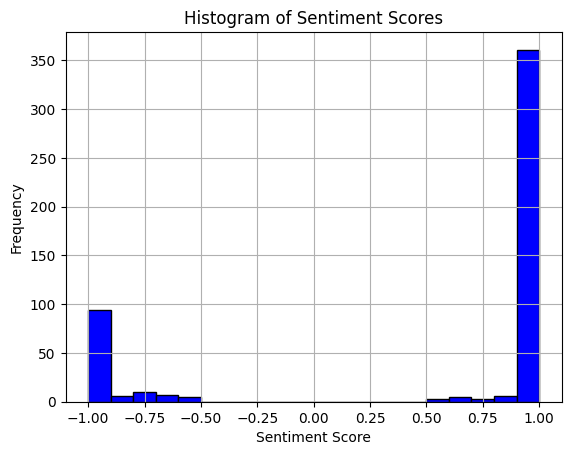

In [ ]:
import matplotlib.pyplot as plt
# Creating a histogram of the sentiment scores
plt.hist(result_df_head["sentiment_score"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As we can see from our sample data, most of the data that is extracted from the review text is either very close to 1 and -1, meaning very positive or negative, and there is a minority that is between 0.5-0.9 and -0.5 and -0.9.
The reason why there is no data between -0.5 and 0.5 is that the sentiment originally is values from 0.5-1 for either positive or negative, meaning, 0.4 of positive is equal to 0.6 negative, so the model is trained to decide either negative or positive. Since of this distribution of the data, we would like to perform discritization, so eventually there would be only 4 values for the sentiment: values that are positive above 0.9 would be classified as "loved", where below that would be "liked". for negative sentiment, we would define values above 0.9 as "hated", where below would be "disliked".

In [ ]:
row_overall_3 = result_df_head.loc[(result_df_head['sentiment_score'] > 0.5) & (result_df_head['sentiment_score'] < 0.9)]
row_overall_3.head(20)

,overall,verified,reviewerID,asin,style,reviewText,summary,__index_level_0__,extracted_category,sentiment_score,sentiment_result,sentiment_label
12,4,True,A3PVNAH1XH34FM,0002051850,{'Format:': ' Paperback'},Hemingway set this in the Spanish Civil War (1...,"a good war story, though a bit drawn out",3675,Literature & Fiction,0.890322,"(0.8903220295906067, POSITIVE)",POSITIVE
39,4,False,AWVQR7YYTYJ1L,0001844423,{'Format:': ' Paperback'},I picked up the complete Chronicles of Narnia ...,Before there was Harry...,7708,Christian Books & Bibles,0.824600,"(0.8245999813079834, POSITIVE)",POSITIVE
49,4,False,A1PDIPZK2HIH5K,0001844423,{'Format:': ' Paperback'},THE CHRONICLES OF NARNIA were the most wonderf...,The Original Order Is VITAL Upon The First Rea...,8759,Christian Books & Bibles,0.612621,"(0.6126205921173096, POSITIVE)",POSITIVE
70,5,False,A1YRZZ1AYR622U,0002180618,{'Format:': ' Hardcover'},I have read this a couple of times in my caree...,Timeless,10515,Business & Money,0.530419,"(0.5304185152053833, POSITIVE)",POSITIVE
152,4,False,A22TRZC8HTRSRU,0002552868,{'Format:': ' Hardcover'},I found this book at a bargain price at a used...,"Dated, But a Superior Book",20630,Biographies & Memoirs,0.774200,"(0.7742001414299011, POSITIVE)",POSITIVE
176,3,False,AOZGMSOVTYLC1,0002310015,{'Format:': ' Paperback'},This is more like a 2.5 stars -- better than j...,Not Christie's Best,24272,"Mystery, Thriller & Suspense",0.692429,"(0.6924289464950562, POSITIVE)",POSITIVE
192,3,False,A2FHD8ZZFRIRZ3,0002255456,{'Format:': ' Paperback'},When 3-year old Ben Cappadora goes missing in ...,A family torn apart,25477,Literature & Fiction,0.899746,"(0.8997460007667542, POSITIVE)",POSITIVE
199,5,False,A2CT2KU6H3CW2V,0002711184,{'Format:': ' Hardcover'},Whatever happened to the French novel? There ...,"By G*org*s, '*'s Got It!",26092,Literature & Fiction,0.860801,"(0.8608009815216064, POSITIVE)",POSITIVE
207,4,False,A3HCPK54FATFO4,0002246791,{'Format:': ' Hardcover'},[My bias and background: I have not yet finish...,technically fascinating,26980,Literature & Fiction,0.847237,"(0.8472369909286499, POSITIVE)",POSITIVE
216,4,False,A3R9SHUD82F9HW,0002614545,{'Format:': ' Paperback'},LIFE AND FATE is a highly hyped novel .The goo...,Maybe the Russian Novel of the 20 th Century,28046,unknown,0.671060,"(0.67106032371521, POSITIVE)",POSITIVE


In [17]:
def get_sentiment_category(row):
    # Choose 'reviewText' as the primary source for analysis
    text = row['reviewText']
    if pd.isna(text):
        return None  # Return None if 'reviewText' is missing

    # Tokenize the text and truncate to the first 512 tokens
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=510, truncation=True)

    # Convert tokens back to text string if necessary (for some models, you can directly input tokens)
    truncated_text = tokenizer.decode(tokens)

    # Perform sentiment analysis
    result = sentiment_analysis(truncated_text)[0]
    score = result['score']
    sentiment = result['label']

    # Determine the category based on score and sentiment
    if sentiment == "POSITIVE":
        if score > 0.9:
            category = "Loved"
        else:
            category = "Liked"
    elif sentiment == "NEGATIVE":
        if score > 0.9:
            category = "Hated"
        else:
          category = "Disliked"

    return category  # Return the category

# Assuming 'result_df' is your DataFrame containing book reviews
result_df['sentiment_category'] = result_df.apply(get_sentiment_category, axis=1)


KeyboardInterrupt: 

KeyboardInterrupt: 

We kept the summary and review text for a long time, however, we can't extract really important data from the review text rather the sentiment, so it seems like the right time to drop them. In addition, we first thought that we would use the feature "verified: True/False" but this also seems meaningless, so we would drop that as well.

In [ ]:
result_df.head()

,overall,reviewerID,asin,style,__index_level_0__,extracted_category
0,4,AEC46NVS07MJ9,0002005263,{'Format:': ' Hardcover'},110,unknown
1,3,A3HCPK54FATFO4,0002005263,{'Format:': ' Hardcover'},232,unknown
2,4,A3TGNIQ0R3V6L7,0002005263,{'Format:': ' Hardcover'},250,unknown
3,5,A2KP0ONGECY1WT,0001384198,{'Format:': ' Hardcover'},1004,Literature & Fiction
4,5,A163MG6D98NFDR,0001381733,{'Format:': ' Hardcover'},1363,Science Fiction & Fantasy


In [ ]:
result_df = result_df.drop(columns=["verified", "reviewText", "summary"])

KeyError: "['verified', 'reviewText', 'summary'] not found in axis"

In [ ]:
# Save the DataFrame to a Parquet file
result_df.to_parquet('/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_1_with_sentiment.parquet')


We did this for all other files.